### Kmeans

In [33]:
import numpy as np 
class KMeans:
    def __init__(self, k, max_it=100):
        self.k = k 
        self.max_it = max_it 
        # self.centroids = None 
    

    def fit(self, X):
        # init centroids 
        self.centroids = X[np.random.choice(X.shape[0], size=self.k, replace=False)]
        # for each it 
        for i in range(self.max_it):
            # assign points to closest centroid 
            # clusters = []
            # for j in range(len(X)):
            #     dist = np.linalg.norm(X[j] - self.centroids, axis=1)
            #     clusters.append(np.argmin(dist))
            dist = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            clusters = np.argmin(dist, axis=1)
            
            # update centroids (mean of clusters)
            for k in range(self.k):
                cluster_X = X[np.where(np.array(clusters) == k)]
                if len(cluster_X) > 0 : 
                    self.centroids[k] = np.mean(cluster_X, axis=0)
            # check convergence / termination 
            if i > 0 and np.array_equal(self.centroids, pre_centroids): 
                break 
            pre_centroids = self.centroids 
        
        self.clusters = clusters 
        
    def predict(self, X):
        clusters = []
        for j in range(len(X)):
            dist = np.linalg.norm(X[j] - self.centroids, axis=1)
            clusters.append(np.argmin(dist))
        return clusters 
        




In [34]:
x1 = np.random.randn(5,2) + 5 
x2 = np.random.randn(5,2) - 5
X = np.concatenate([x1,x2], axis=0)


kmeans = KMeans(k=2)
kmeans.fit(X)
clusters = kmeans.predict(X)
print(clusters)
print(kmeans.centroids)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[[ 4.62131563  5.38818365]
 [-4.47889882 -4.71564167]]


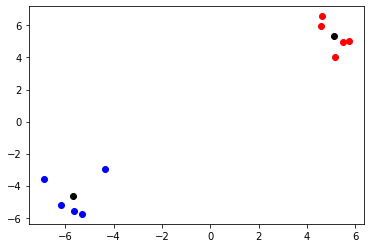

In [19]:
from matplotlib import pyplot as plt 

colors = ['b', 'r']
for k in range(kmeans.k):
    plt.scatter(X[np.where(np.array(clusters) == k)][:,0], 
                X[np.where(np.array(clusters) == k)][:,1], 
                color=colors[k])
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], color='black')
plt.show()

In [22]:
X[:, np.newaxis] 

(10, 1, 2)

### KNN

In [66]:
import numpy as np 
from collections import Counter
class KNN:
    def __init__(self, k):
        self.k = k 
    
    
    def fit(self, X, y):
        self.X = X
        self.y = y 
    
    def predict(self, X_test):
        y_pred = []
        for x in X_test: 
            dist = np.linalg.norm(x - self.X, axis=1)
            knn_idcs = np.argsort(dist)[:self.k]
            knn_labels = self.y[knn_idcs]
            label = Counter(knn_labels).most_common(1)[0][0]
            y_pred.append(label)
        return np.array(y_pred)


from sklearn.model_selection import train_test_split

x1 = np.random.randn(50,2) + 1
x2 = np.random.randn(50,2) - 1
X = np.concatenate([x1, x2], axis=0)
y = np.concatenate([np.ones(50), np.zeros(50)])
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


knn = KNN(k=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)
print(y_test)


(100, 2) (100,)
[0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
[0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1.]


In [59]:
X_test.shape

(40, 2)

In [42]:
np.zeros(2,)

array([0., 0.])

In [53]:
np.concatenate([np.ones(3), np.zeros(3)])

array([1., 1., 1., 0., 0., 0.])

### Lin Regression 

In [ ]:
class LinearRegression: 
    def __init__(self):
        self.m = None 
        self.b = None 
    
    def fit(self, X, y):
        


    def predict(self, X):
        pass 